<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/Grovers_algorithm__practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
# !pip install qiskit qiskit-aer pylatexenc

In [317]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCMTGate, XGate
import numpy as np

In [318]:
def diffuser(n):
  QC=QuantumCircuit(n)

  QC.h(range(n))

  QC.x(range(n))

  QC.h(n-1)

  diff_mcmt=MCMTGate(XGate(), n-1, 1, ctrl_state='1'*(n-1))

  QC.append(diff_mcmt,range(n))

  QC.h(n-1)

  QC.x(range(n))

  QC.h(range(n))

  return QC.to_instruction(label='diffuser')

In [319]:
N=8
X='110'
n=int(np.ceil(np.log2(N)))

In [320]:
QC=QuantumCircuit(n+1,n)

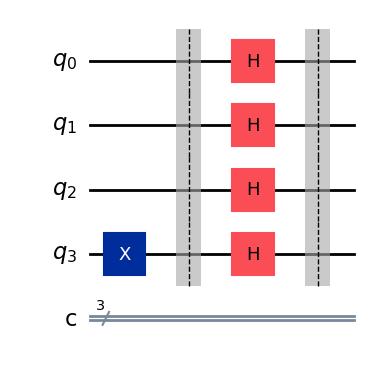

In [321]:
QC.x(n)
QC.barrier()

QC.h(range(n+1))

QC.barrier()

QC.draw('mpl')

In [322]:
k=round(np.pi/4 * np.sqrt(N))

In [323]:
for i in range(k):
  oracle=MCMTGate(XGate(), n, 1, ctrl_state=X[::-1])
  QC.append(oracle,range(n+1))

  QC.barrier()

  diff=diffuser(n)

  QC.append(diff, range(n))

  QC.barrier()

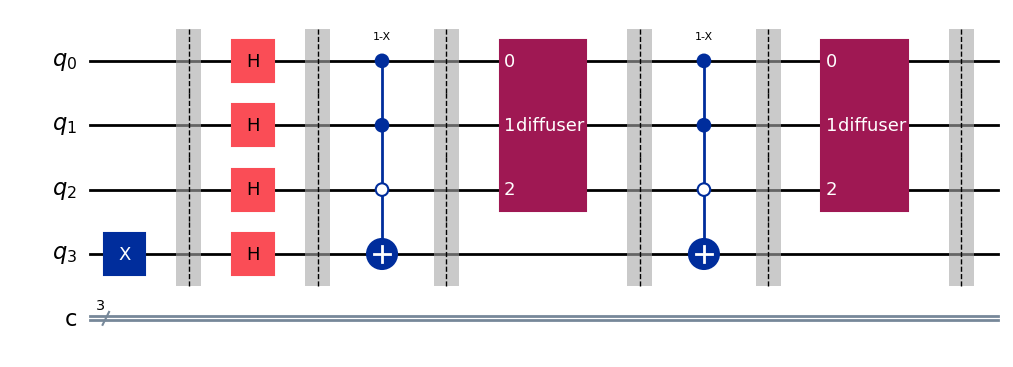

In [324]:
QC.draw('mpl')

In [325]:
QC.measure(range(n),range(n))

In [326]:
simulator=AerSimulator()

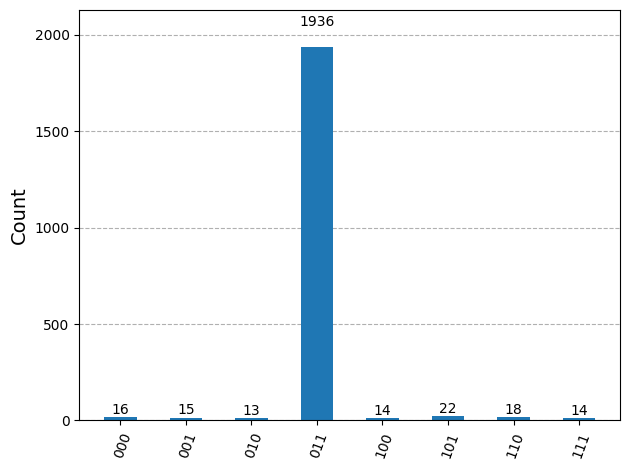

In [327]:
transpiled_QC=transpile(QC,simulator)

result=simulator.run(transpiled_QC, shots=2048).result()
counts=result.get_counts()

plot_histogram(counts)